# Settings

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
import itertools
import matplotlib.dates as mdates
from datetime import datetime, timedelta


from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [151]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv('monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


# Task


    Build a prediction model using the Propeht library.
    Make a prediction for the year ahead (12 months)
    When building a model, use cross-validation

# Data set preparation

In [34]:
# convert column 'Month' to datetime type

df['Month'] = pd.to_datetime(df['Month'])


In [35]:
df.tail(5)

,Month,Sales
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


The data set is already agrregated by month.

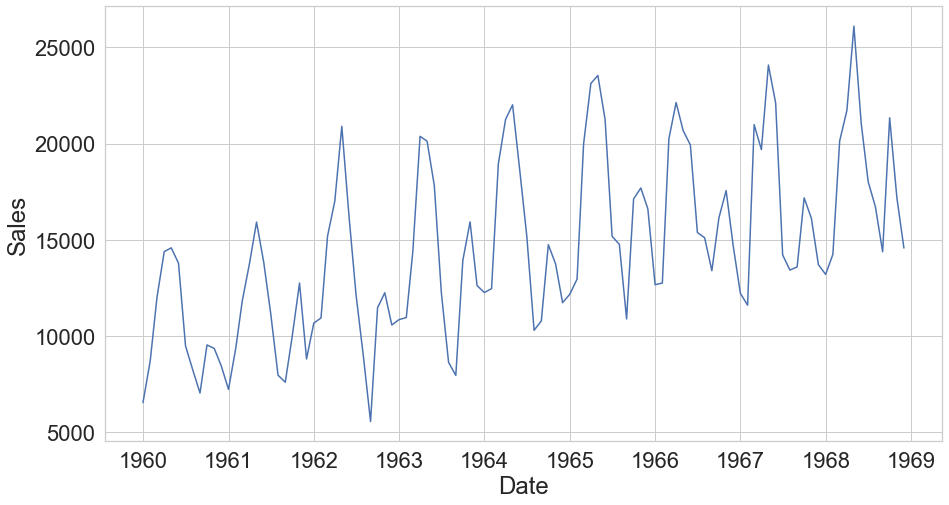

In [48]:
#look at the time series

sns.lineplot(data=df, x='Month', y='Sales')
plt.xlabel('Date');

Visual analysis allows us to conclude about the annual seasonality and the increasing trend.

In [42]:
df['Sales'].rolling(12).mean()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
103    17655.916667
104    17721.500000
105    18067.750000
106    18156.166667
107    18228.166667
Name: Sales, Length: 108, dtype: float64

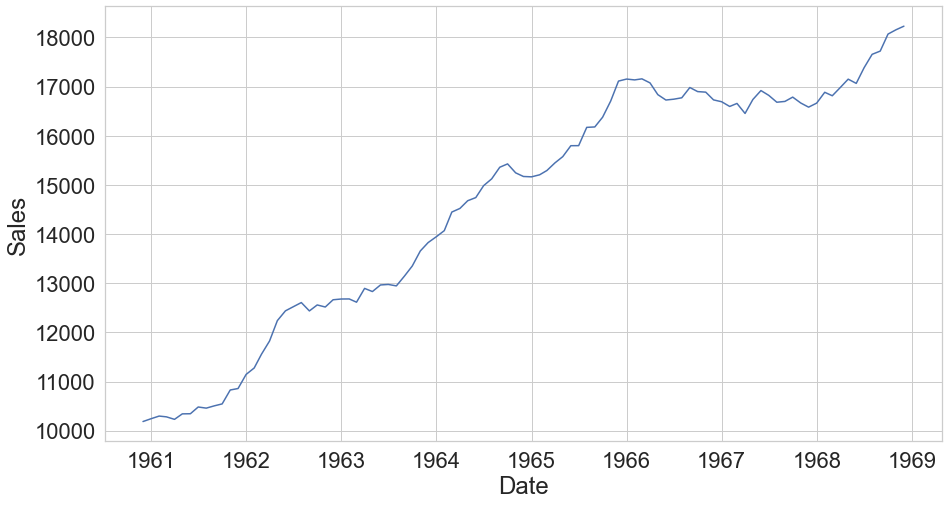

In [47]:
sns.lineplot( x=df['Month'], y=df['Sales'].rolling(12).mean())
plt.xlabel('Date');

In [51]:
df.rename(columns = {'Month': 'ds',
                    'Sales': 'y'},
         inplace=True)

In [52]:
df.head(3)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026


# First modell

In [152]:
m = Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

In [153]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,9600.274043,4536.522297,7613.612531,9600.274043,9600.274043,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,-3464.315527,0.0,0.0,0.0,6135.958515
1,1960-02-01,9704.265356,5231.498535,8351.503891,9704.265356,9704.265356,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,-2952.452083,0.0,0.0,0.0,6751.813273
2,1960-03-01,9801.547552,11183.584109,14380.725221,9801.547552,9801.547552,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,2943.121970,0.0,0.0,0.0,12744.669521
3,1960-04-01,9905.538865,13341.129357,16223.450417,9905.538865,9905.538865,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,4911.905978,0.0,0.0,0.0,14817.444842
4,1960-05-01,10006.175619,14599.328367,17761.689779,10006.175619,10006.175619,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,6158.054189,0.0,0.0,0.0,16164.229808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1969-08-01,18842.171737,14142.399588,17294.321732,18826.538541,18858.309699,-3087.689474,-3087.689474,-3087.689474,-3087.689474,-3087.689474,-3087.689474,0.0,0.0,0.0,15754.482263
116,1969-09-01,18897.597747,12856.922989,15970.297481,18878.881475,18917.695549,-4635.526044,-4635.526044,-4635.526044,-4635.526044,-4635.526044,-4635.526044,0.0,0.0,0.0,14262.071702
117,1969-10-01,18951.235821,17111.919737,20274.641086,18928.448107,18975.322733,-253.318301,-253.318301,-253.318301,-253.318301,-253.318301,-253.318301,0.0,0.0,0.0,18697.917520
118,1969-11-01,19006.661831,16865.894017,20133.721467,18978.873119,19034.648000,-413.829424,-413.829424,-413.829424,-413.829424,-413.829424,-413.829424,0.0,0.0,0.0,18592.832407


In [154]:
forecast.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: object

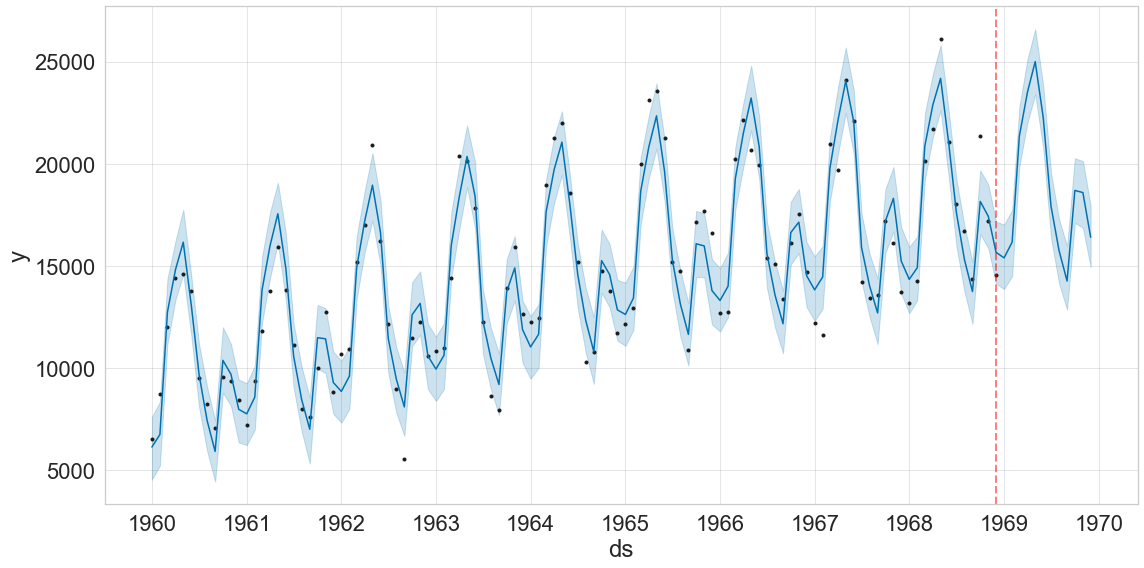

In [155]:
import matplotlib.lines as lines

fig = m.plot(forecast, figsize=(16,8))

x_line = (forecast['ds'].max()- np.timedelta64(365,'D'))
plt.axvline(x=x_line, c='red', lw=2, alpha=0.5, ls='--');


Let's look at the forecast  components.

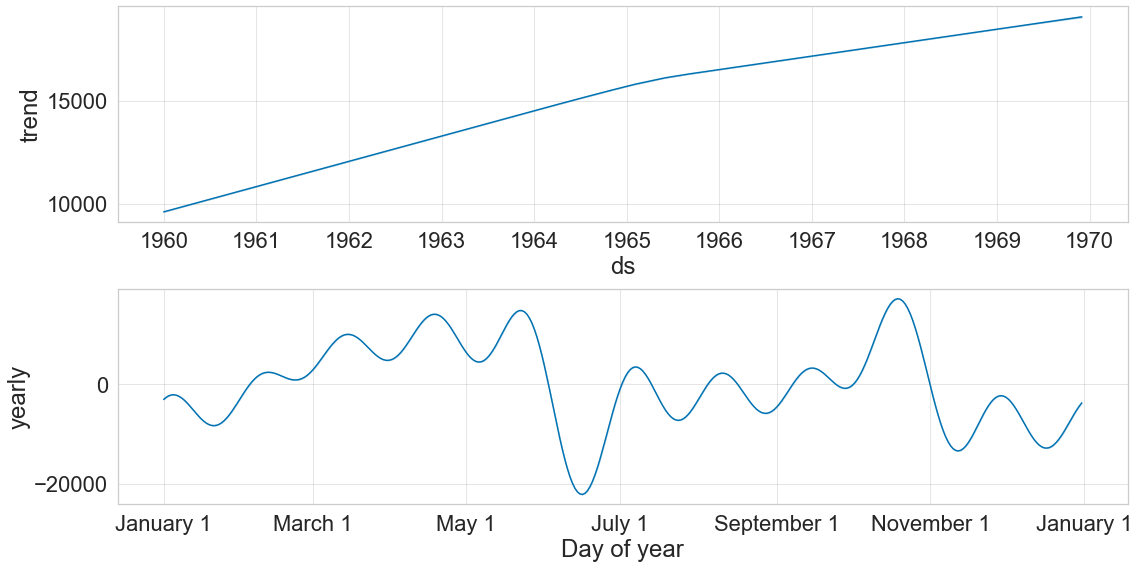

In [156]:
fig = m.plot_components(forecast,figsize=(16,8))

# Cross-Validation

Parameters:

    initial - train dataset size
    horizon - the size of dataset for validation
    period - distance between cutoff points
    cutoff - start of validation

 To do cross validation on monthly data, with periods as month, not a days, let's specify manually the cutoff locations.

In [243]:
cutoffs = pd.date_range(start='1964-12-01', end='1967-12-01', freq='6MS')
cutoffs



DatetimeIndex(['1964-12-01', '1965-06-01', '1965-12-01', '1966-06-01',
               '1966-12-01', '1967-06-01', '1967-12-01'],
              dtype='datetime64[ns]', freq='6MS')

In [244]:
#cross-validation

df_cv = cross_validation(m, horizon='365 days', cutoffs=cutoffs)

  0%|          | 0/7 [00:00<?, ?it/s]

In [245]:
# check cutoffs in df_cv
df_cv['cutoff'].unique() 

array(['1964-12-01T00:00:00.000000000', '1965-06-01T00:00:00.000000000',
       '1965-12-01T00:00:00.000000000', '1966-06-01T00:00:00.000000000',
       '1966-12-01T00:00:00.000000000', '1967-06-01T00:00:00.000000000',
       '1967-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [246]:
df_cv.to_excel('df_cv.xlsx')

In [247]:
df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[1]]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
12,1965-07-01,16091.709321,14875.403021,17435.233821,15189,1965-06-01
13,1965-08-01,12917.992157,11705.033193,14182.822263,14767,1965-06-01
14,1965-09-01,11974.961755,10803.819207,13215.923968,10895,1965-06-01
15,1965-10-01,15930.327808,14718.793553,17154.654731,17130,1965-06-01
16,1965-11-01,16696.839450,15500.540591,17921.977134,17697,1965-06-01
17,1965-12-01,14451.930767,13181.214511,15582.449284,16611,1965-06-01
18,1966-01-01,14647.556601,13422.176669,15926.169163,12674,1965-06-01
19,1966-02-01,15653.974119,14444.953727,16891.635417,12760,1965-06-01
20,1966-03-01,19351.978599,18188.447543,20577.773990,20249,1965-06-01
21,1966-04-01,23193.560318,21964.833813,24456.032264,22135,1965-06-01


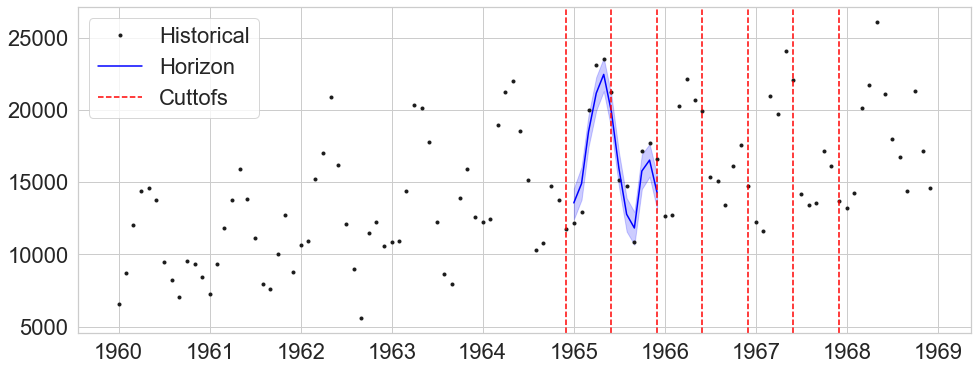

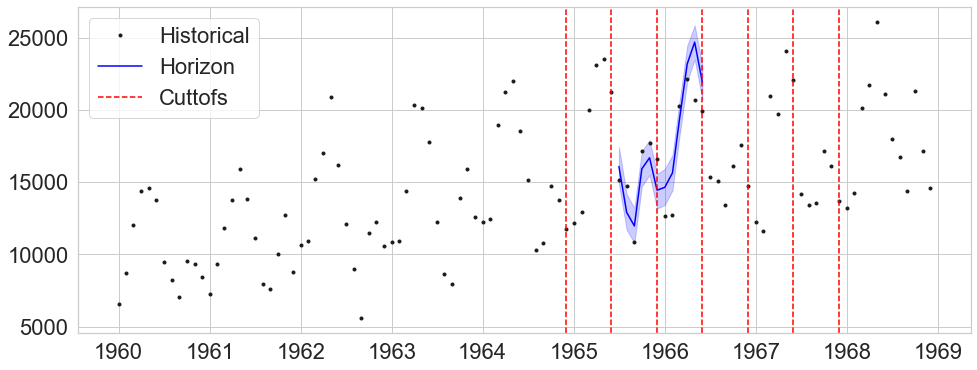

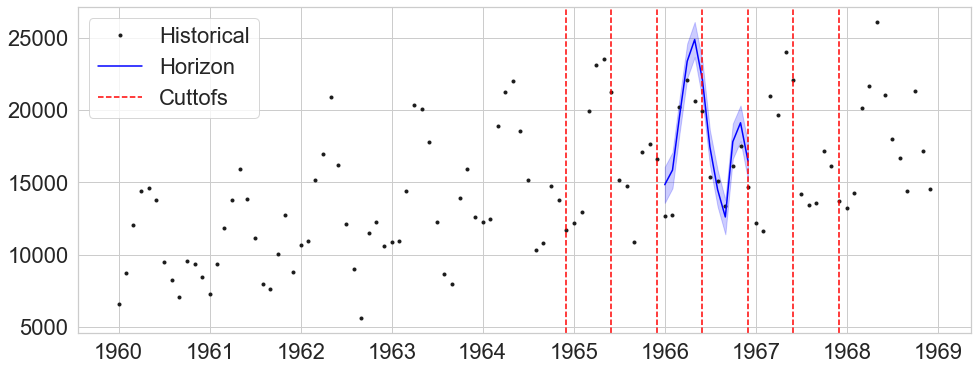

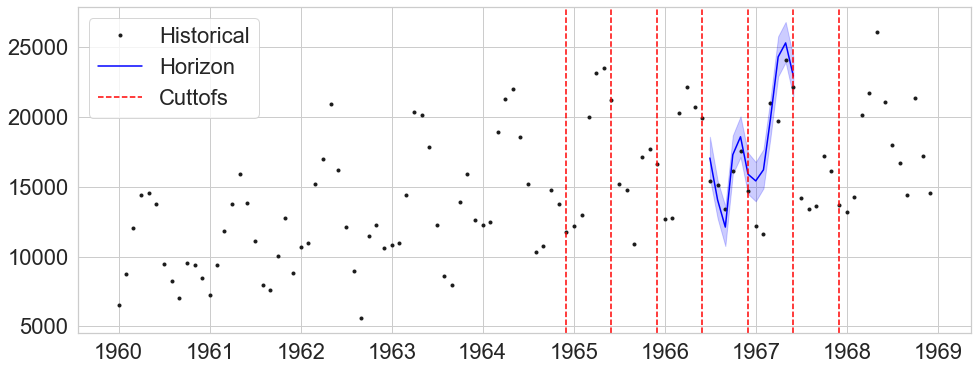

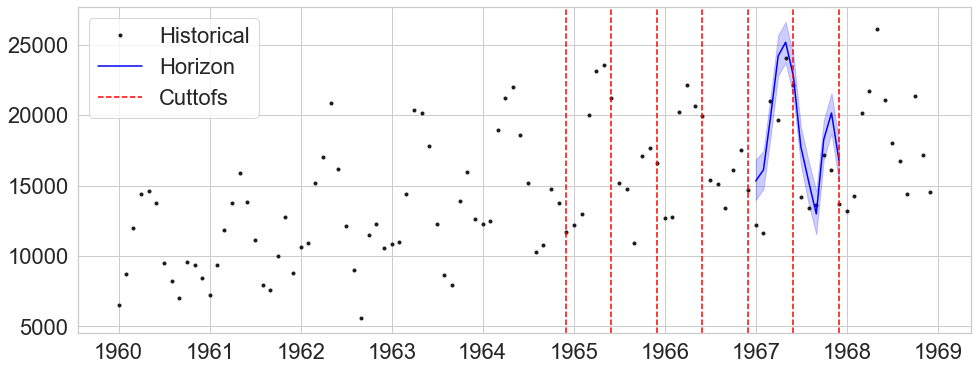

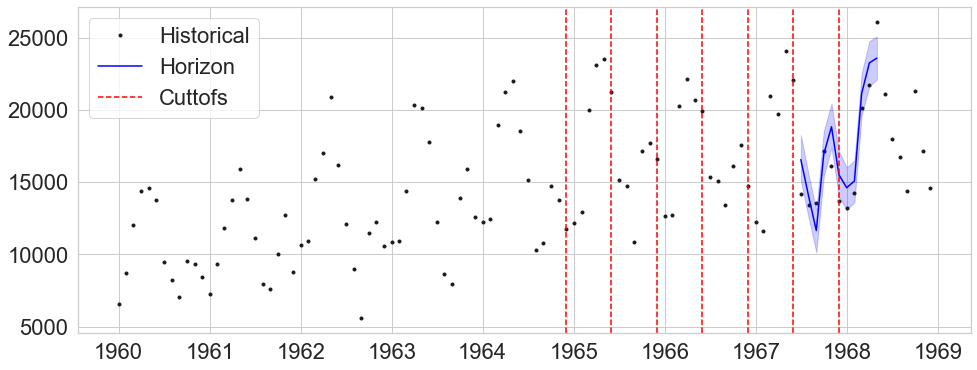

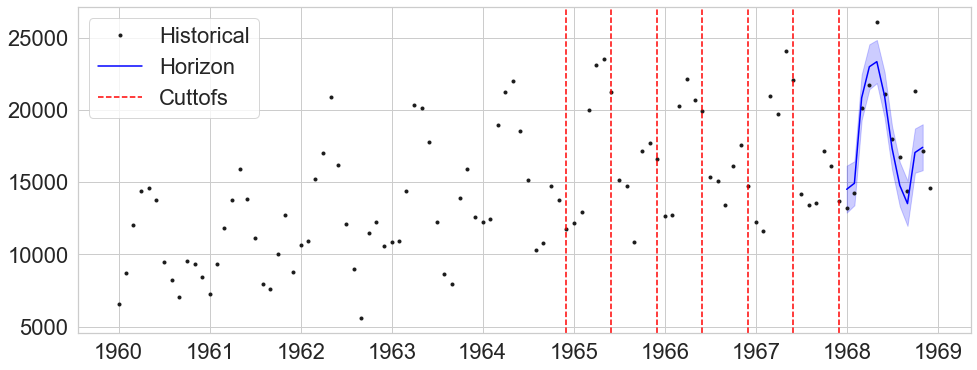

In [248]:
# visualization
for i in range(len(df_cv['cutoff'].unique())):
    df_cv2 = df_cv[df_cv['cutoff']==df_cv['cutoff'].unique()[i]]

    fig, ax = plt.subplots(figsize=(16,6))

    ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
    ax.plot(df_cv2['ds'], df_cv2['yhat'], ls = '-', label = 'Horizon', color='blue')
    ax.fill_between(df_cv2['ds'],
                    df_cv2['yhat_lower'],
                    df_cv2['yhat_upper'],
                    color = 'blue',
                    alpha = 0.2)
    for i in range(len(cutoffs)):
        plt_dict = {'x': cutoffs[i],
                   'c': 'red',
                    'ls':'--'
                   }
        if i == 0:
            plt_dict['label'] = 'Cuttofs'
        ax.axvline(**plt_dict)
    ax.legend()
    plt.show()

Let's look at the metrics

In [250]:

df_p = performance_metrics(df_cv)

In [251]:
df_p.mean()

horizon     208 days 14:13:20
mse            4478061.513613
rmse              2088.700346
mae               1769.907497
mape                 0.110152
mdape                0.089676
smape                0.104797
coverage             0.502006
dtype: object